<a href="https://colab.research.google.com/github/Bhoomikadayal/capstone-project-3-Bank-Marketing-Effectiveness-Prediction-classification-/blob/main/Bank_Marketing_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bank Marketing Effectiveness Prediction

##### **Project Type**    - Classification
##### **Contribution**    - Individual
#####**Team Name** - Bhoomika Dayal
##### **Name** - Bhoomika Dayal

# **GitHub Link -**

Bhoomika Dayal -
https://github.com/Bhoomikadayal/capstone-project-3-Bank-Marketing-Effectiveness-Prediction-classification-

# **Project Summary -**

All bank marketing campaigns are dependent on customer’s huge electronic data. The size of these data sources is impossible for a human analyst to come up with interesting information that will help in the decision-making process. Data mining models are completely helping in the performance of these campaigns. The purpose is increasing the campaign effectiveness by identifying the main characteristics that affect the success based on a handful of algorithms that we will test (e.g. Logistic Regression, Random Forests, Decision Trees and others). With the experimental results we will demonstrate the performance of the models by statistical metrics like accuracy, sensitivity, precision, recall, etc. With the higher scoring of these metrics, we will be able to judge the success of these models in predicting the best campaign contact with the clients for subscribing deposit. The aim of the marketing campaign was to get customers to subscribe to a bank term deposit product. Whether they did this or not is variable ‘y’ in the data set. The bank in question is considering how to optimize this campaign in future.

The objective is to know the fundamentals of the data like :
* Shape of Data
* Duplicate value
* Missing value
* Understanding the variable
* Checking the categorical and Numerical feature
* EDA
* Univariate Analysis/Bivariate Analysis/Multivariate Analysis
* We will be creating a classification algorithm and the insights we derive from this dataset with the help of
* Feature engineering and data pre-processing
* Handling with outliers
* categorical encoding
* feature manipulation and selection
* Handling imbalanced dataset
* Data Splitting(Train-test split)
* Data scaling
* Created some functions for evalution and visualizing of model.
ML model implementation: (Logistics Regression, Random forest, Xg boost Classifer)

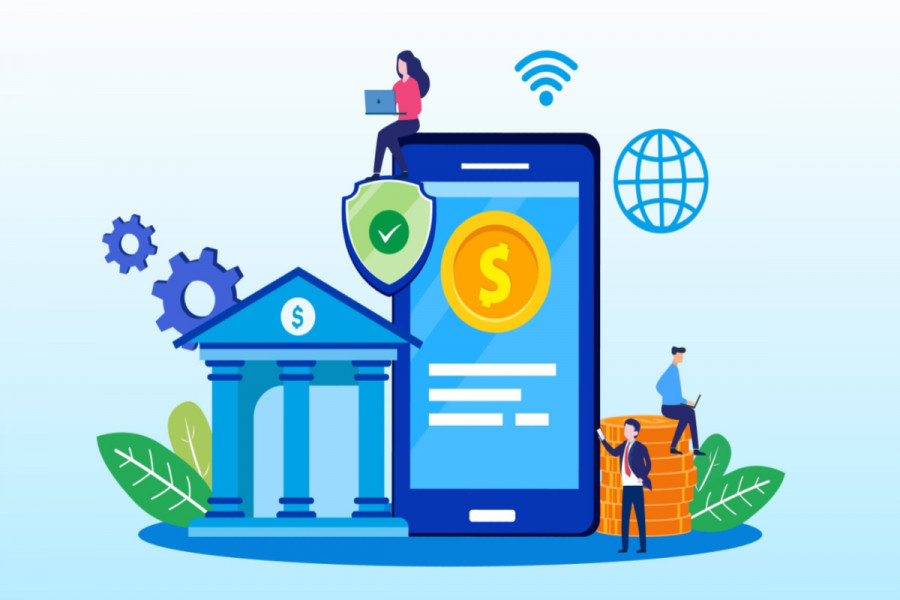

# **Problem Statement**

**The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess if the product (bank term deposit) would be ('yes') or not ('no') subscribed. The classification goal is to predict if the client will subscribe to a term deposit (variable y).**

# **Business Problem**

**The business problem is a binary classification problem. The classification goal is to predict if the client contacted through the marketing campaign will subscribe a term deposit.**

## <b> Data Description </b>

### <b>The classification goal is to predict if the client will subscribe to a term deposit (variable y).</b>

###*  age (numeric)
###*  job : type of job (categorical: admin, blue-collar, entrepreneur, housemaid,management, retired, self-employed, services, student, technician, unemployed, unknown)
###*  marital : marital status (categorical: divorced, married, single, unknown; note: 'divorced' means divorced or widowed)
###*  education (categorical:high.school, illiterate, professional.course, university.degree, unknown)
###*  default: has credit in default? (categorical: no, yes, unknown)
###*  housing: has housing loan? (categorical: no, yes, unknown)
###*  loan: has personal loan? (categorical: no, yes, unknown)

##<b> Related with the last contact of the current campaign:</b>
###*  contact: contact communication type (categorical: cellular,telephone)
###*  month: last contact month of year (categorical: jan, feb, mar, april, may,june, july, aug, sep, oct, nov, dec)
###*  duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration = 0 then y ='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

## <b>Other attributes: </b>
###*  campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
###*  pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
###*  previous: number of contacts performed before this campaign and for this client (numeric)
###* poutcome: outcome of the previous marketing campaign (categorical: failure, nonexistent, success)

## <b>Output variable (desired target):</b>
###*  y - has the client subscribed a term deposit? (binary: 'yes', 'no')


# ***Let's Begin !***

## ***1. Know Your Data***
### Dataset Loading from google drive and Import Libraries

In [72]:
# mount the dataset from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
#import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [74]:
# load the data set from drive
df = pd.read_csv('/content/drive/MyDrive/casptone project - 3 (classification)/bank-full.csv', sep = ";")

### Dataset First View

In [75]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [76]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [77]:
# Shape of data.

print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 45211 rows and 17 columns.


### Dataset Rows & Columns count
it tells us that there is 45211 rows and 17 columns in that dataset

In [78]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# **Preprocessing the dataset**

* Deal with null/missing values
* Deal with duplicate data


In [79]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [80]:
# checking the null value
df.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [81]:
# dataset duplicate value count
a = df.duplicated().sum()
print(f"the duplicates values in data is {a}")

the duplicates values in data is 0


###We found that there is no duplicates values in that data set and no null values that makes easy for prediction.

## ***2. Understanding Your Variables***

In [82]:
# Dataset columns
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [83]:
# Description of data. (i.e statistical values)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


# **Exploratory Data Analysis Of The Data Set**

**Why do we perform EDA?**
* ***An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.***

## ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**Analysation of variables:**

In [84]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
numerical = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous','y']

In [85]:
print('Categorical features:', categorical)
print('Numerical features:', numerical)

Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
Numerical features: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']


##Numerical features

#### Chart - 1

Text(0.5, 0, 'y: target variable')

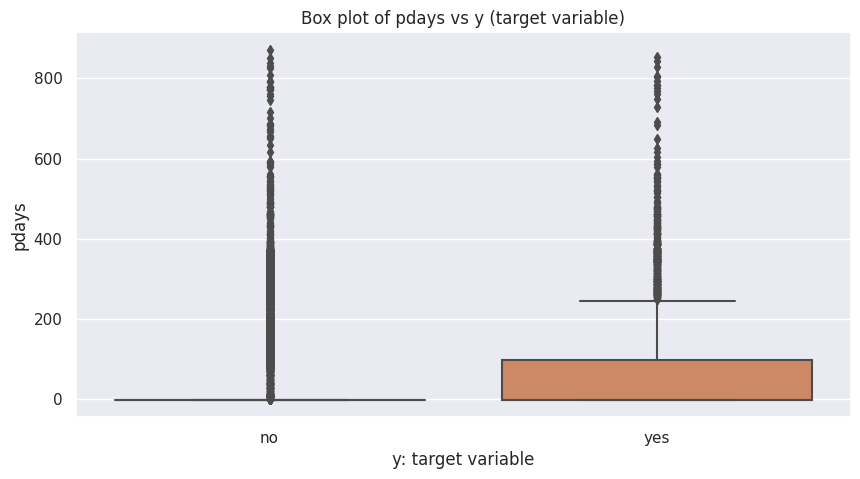

In [86]:
ax=plt.subplots(figsize=(10,5))
sns.boxplot(y=df['pdays'], x=df['y'])
plt.title('Box plot of pdays vs y (target variable)')
plt.xlabel('y: target variable')

In [87]:
df.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

Observation:
* 75% clients contacted through campaign are not previously contacted.
* Mean of pdays is 40.20
* There are outliers as we can see from boxplot.

#### Chart - 2

Text(0.5, 0, 'y:target variable')

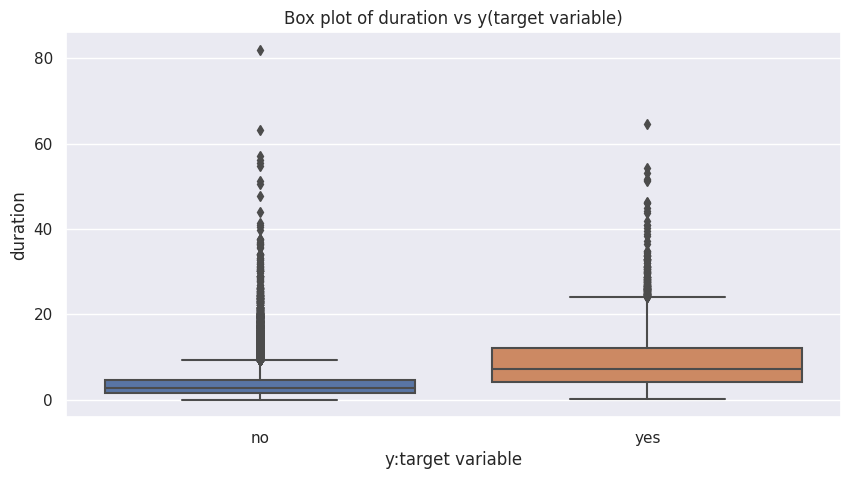

In [88]:
# converting call duration from seconds to minute
ax=plt.subplots(figsize=(10,5))
df['duration'] = df['duration']/60
sns.boxplot(y=df['duration'], x=df['y'])
plt.title('Box plot of duration vs y(target variable)')
plt.xlabel('y:target variable')

In [89]:
df.duration.describe()

count    45211.000000
mean         4.302718
std          4.292130
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

Observation:
* 75% call duration are less than or equal to 5.32.
* Duration have a mean of 4.30 and standard-deviation 4.29
* There are outliers points in duration.

#### Chart - 3

Text(0.5, 0, 'y:target variable')

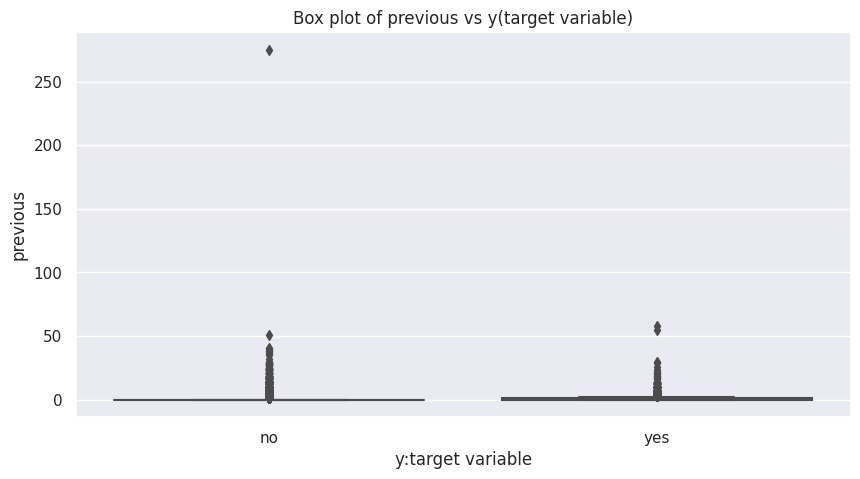

In [90]:
ax=plt.subplots(figsize=(10,5))
sns.boxplot(y=df['previous'], x=df['y'])
plt.title('Box plot of previous vs y(target variable)')
plt.xlabel('y:target variable')

In [91]:
df.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

Observation:
* 75% of previous values equal 0 and 99% values <= 8.90
* Duration have a mean of 0.58 and standard-deviation 2.30
* There are outliers points in duration.

#### Chart - 4

Text(0.5, 0, 'y:target variable')

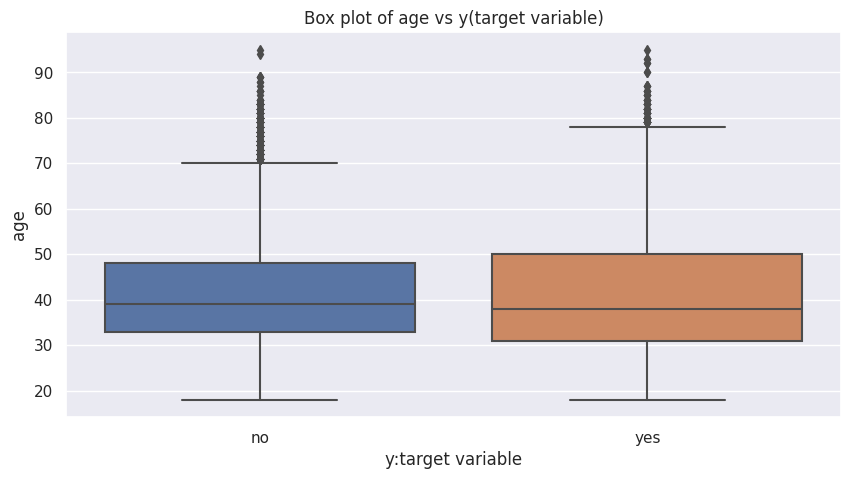

In [92]:
ax=plt.subplots(figsize=(10,5))
sns.boxplot(y=df['age'], x=df['y'])
plt.title('Box plot of age vs y(target variable)')
plt.xlabel('y:target variable')

In [93]:
# Checking the distribution of Age with respect to balance column.
fig = px.scatter(df, x="age", y="balance", color="y")
#fig.update_traces(quartilemethod="exclusive")
fig.show()

Observation:
* This analysis gives the insights majority of the clients between 18 to 35 have low balance and on the otherhand clients of age 60 have good balance and can be potential clients.

#### Chart - 5

In [94]:
# Checking the distribution of campign with respect to duration column.
fig = px.scatter(df, x="campaign", y="duration", color="y")
fig.show()

Observation
* More campaign lead to a more positive impact on the deposit of an account.
* This means face-to-face marketing is better than telephonic marketing.

#### Chart - 6

Text(0.5, 1.0, 'Count Plot of job for target variable')

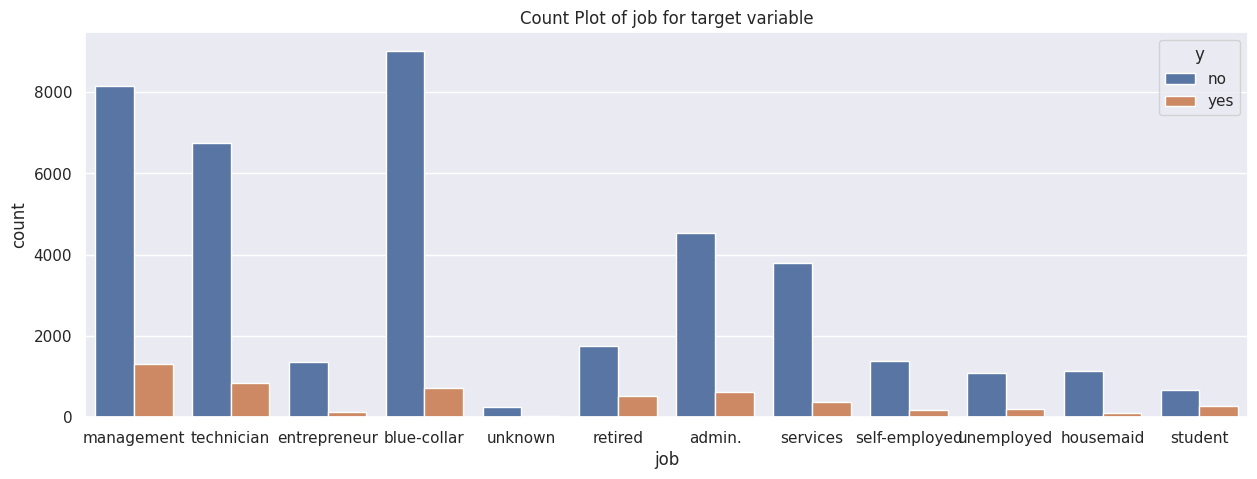

In [95]:
# Checking the distribution of campign with respect to duration column.
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(x=df['job'],hue=df['y'])
plt.title('Count Plot of job for target variable')

Observation:
* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.
* Success rate is highest for student.

#### Chart - 7

Text(0.5, 1.0, 'Count Plot of poutcome for target variable')

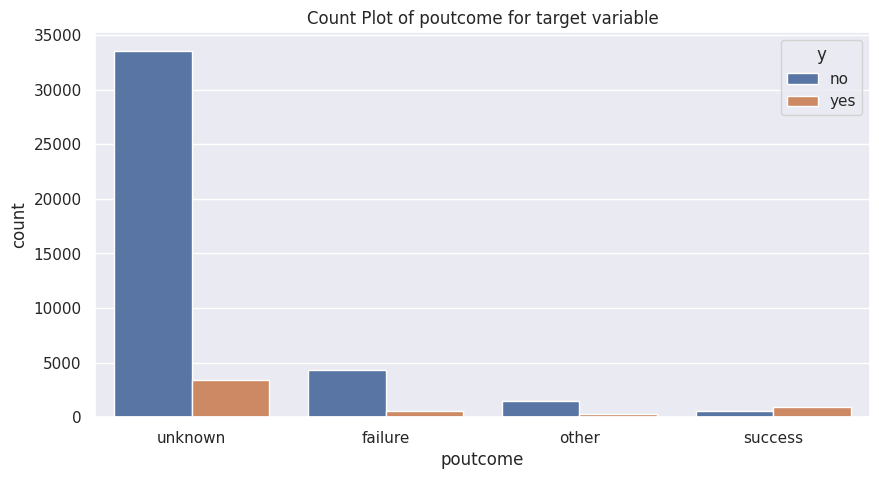

In [96]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['poutcome'],hue=df['y'])
plt.title('Count Plot of poutcome for target variable')

Observation:

Most of the clients contacted have previous outcome as 'unknown'.

#### Chart - 8

Text(0.5, 1.0, 'Count plot of education for target variable y')

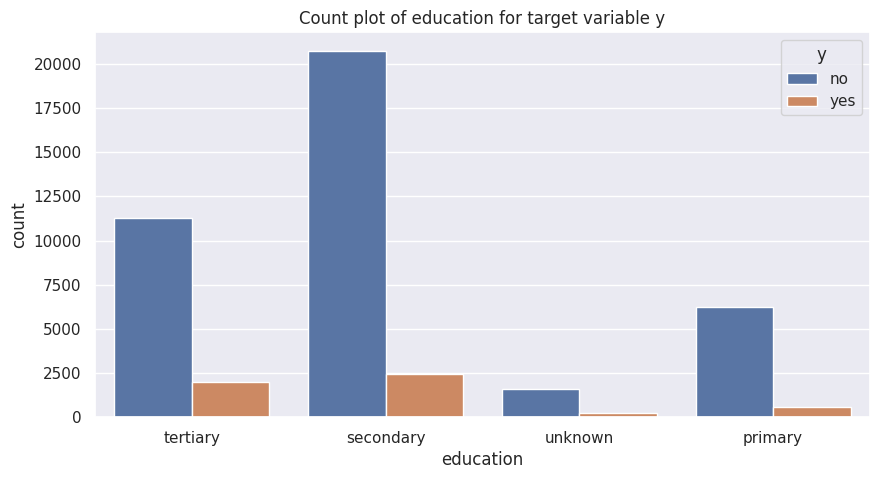

In [97]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['education'],hue=df['y'])
plt.title('Count plot of education for target variable y')

Observation:
* Most of the people who are contacted have tertiray or secondary education.

#### Chart - 9

Text(0.5, 1.0, 'Count plot of default for target variable y')

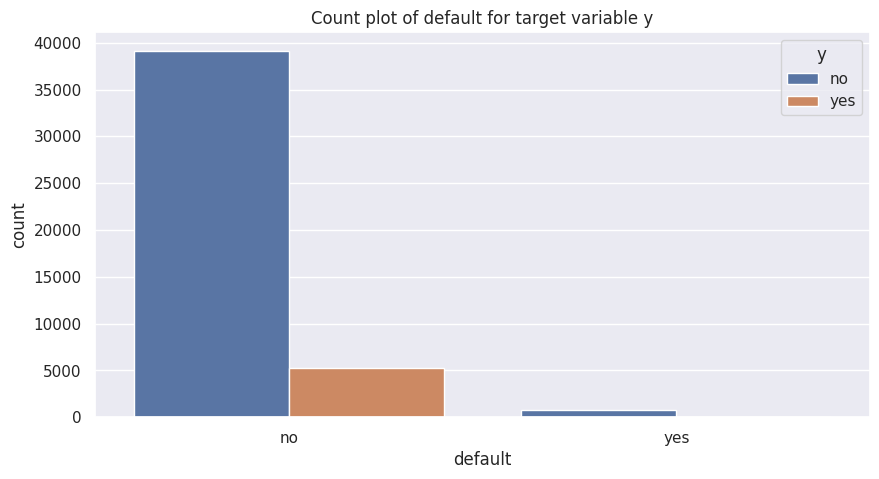

In [98]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['default'],hue=df['y'])
plt.title('Count plot of default for target variable y')

Observation:
* Very few clients are contacted who are defaulter.

#### Chart - 10

Text(0.5, 1.0, 'Count plot of loan for target variable y')

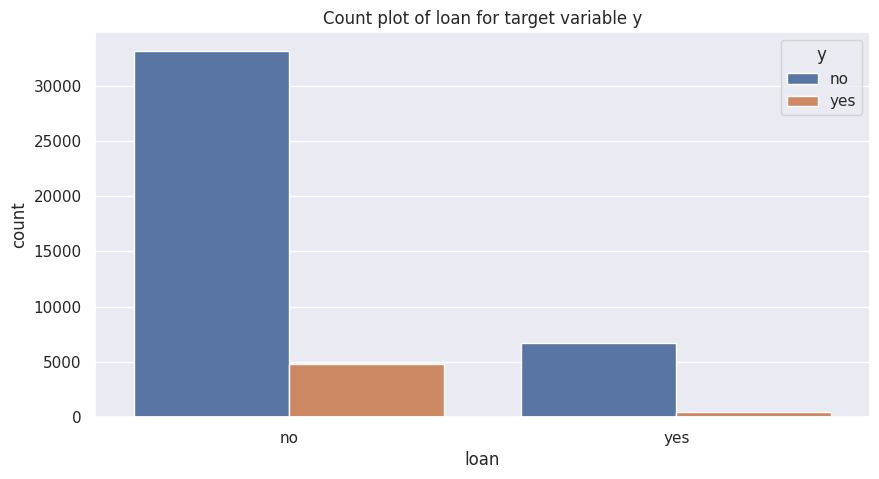

In [99]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['loan'],hue=df['y'])
plt.title('Count plot of loan for target variable y')

Observation:
* As seen for default variable, less client are contacted who have loan.

#### Chart - 11

Text(0.5, 1.0, 'Count plot of contact for target variable y')

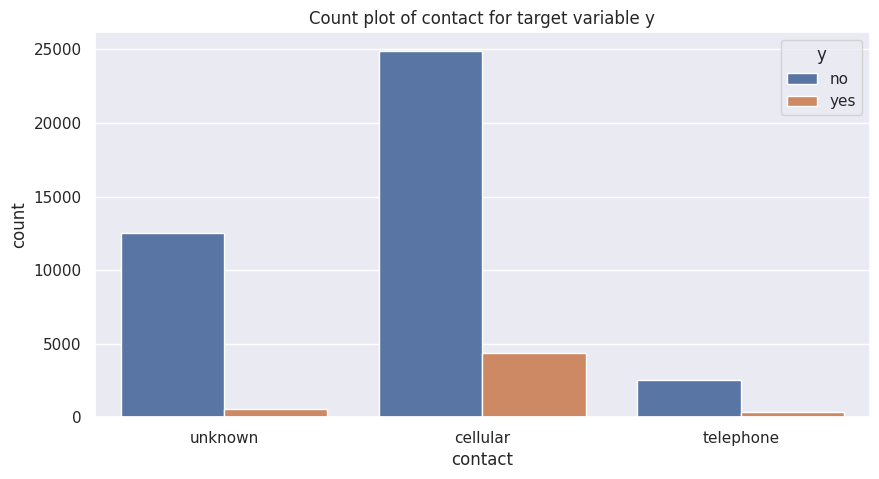

In [100]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['contact'],hue=df['y'])
plt.title('Count plot of contact for target variable y')

Observation:
* Most of the people are contacted through cellular

#### Chart - 12

Text(0.5, 1.0, 'Count plot of month for target variable y')

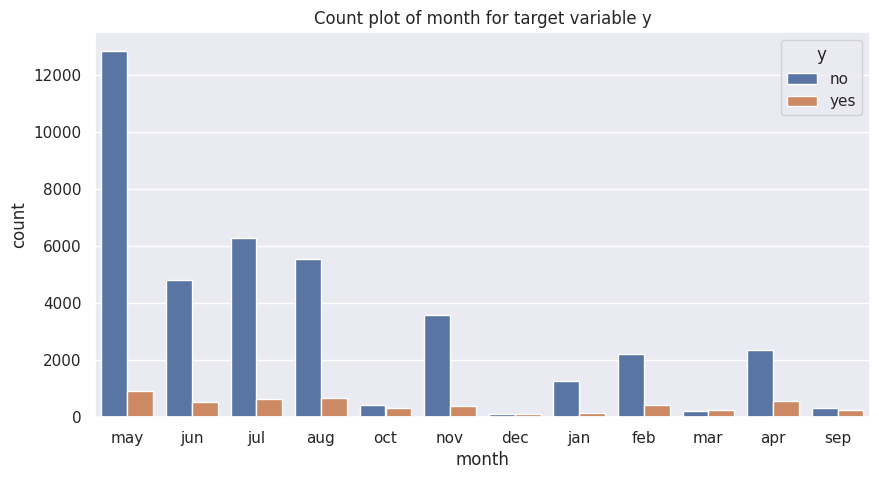

In [101]:
fig,ax=plt.subplots(figsize=(10,5))
sns.countplot(x=df['month'],hue=df['y'])
plt.title('Count plot of month for target variable y')

Observation:
* Most of the clients (approx 1/3 of total) are contacted in the month of May but the success rate is only 6.7%.
* March have highest success rate.

## **Check Correlation**

In [102]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


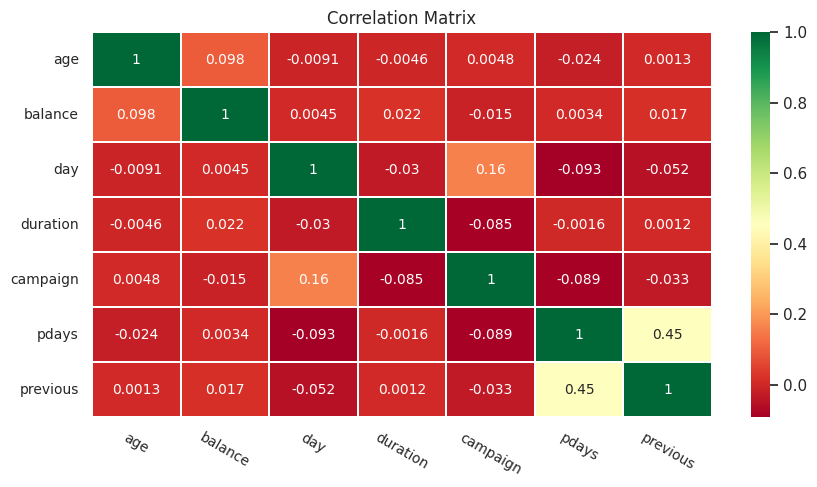

In [103]:
corr_data = df[numerical]
corr = corr_data.corr()
plt.close()
cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(10,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

Observation:
* Over numerical features have very less correlation between them.
* pdays and previous have higher correlation

### Handling Outliers

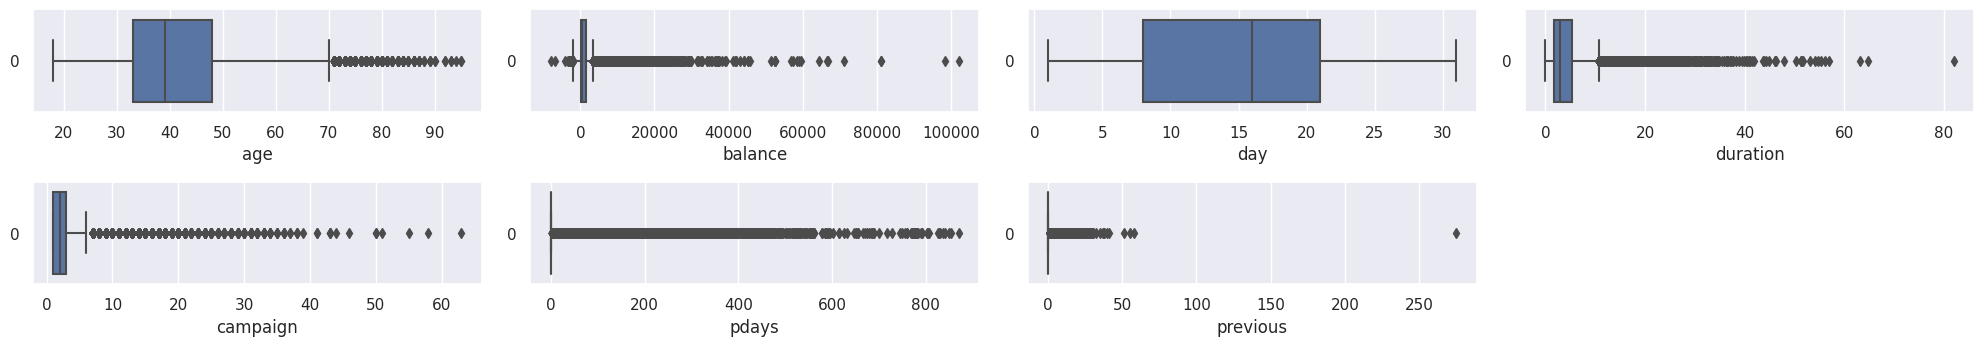

In [104]:
# looking for outliers of every feature of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col],orient='h')
    plt.xlabel(col)
    num_it+=1

plt.tight_layout()

In [105]:
from scipy import stats
z = np.abs(stats.zscore(df[['age','balance','duration','campaign','pdays','previous']]))
print(z)
df=df[(z<3).all(axis=1)]
df.shape

            age   balance  duration  campaign     pdays  previous
0      1.606965  0.256419  0.011016  0.569351  0.411453  0.251940
1      0.288529  0.437895  0.416127  0.569351  0.411453  0.251940
2      0.747384  0.446762  0.707361  0.569351  0.411453  0.251940
3      0.571051  0.047205  0.645231  0.569351  0.411453  0.251940
4      0.747384  0.447091  0.233620  0.569351  0.411453  0.251940
...         ...       ...       ...       ...       ...       ...
45206  0.947747  0.176460  2.791329  0.076230  0.411453  0.251940
45207  2.831227  0.120447  0.768224  0.246560  0.411453  0.251940
45208  2.925401  1.429593  3.373797  0.721811  1.436189  1.050473
45209  1.512791  0.228024  0.970146  0.399020  0.411453  0.251940
45210  0.370689  0.528364  0.399328  0.246560  1.476138  4.523577

[45211 rows x 6 columns]


(40209, 17)

* Choosing the technique called z score in order to deal with outliers and scaled down the data.

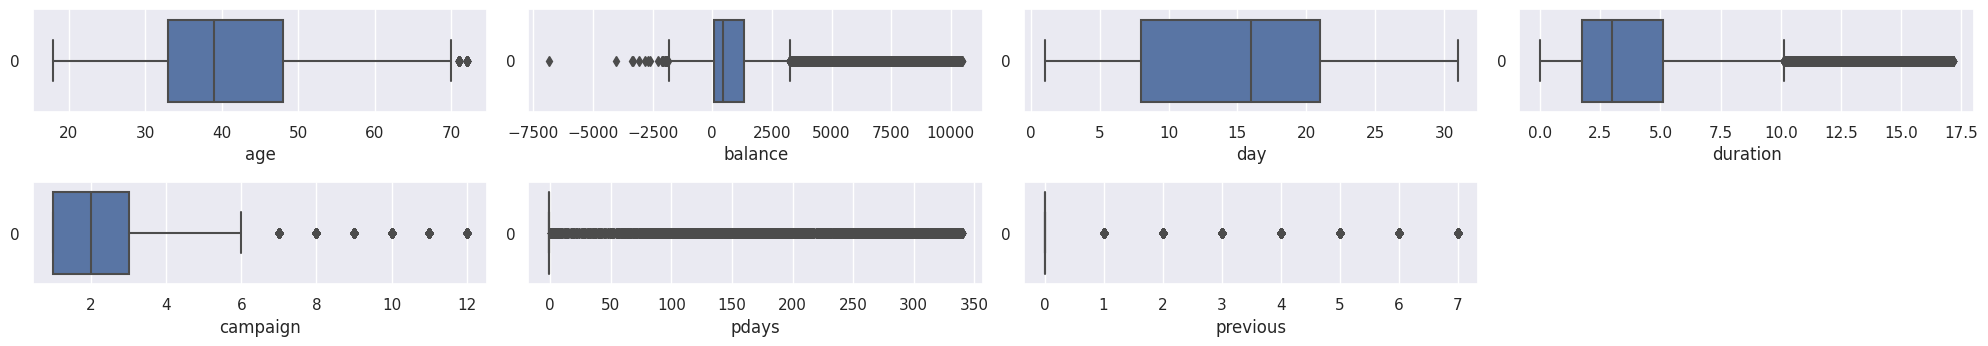

In [106]:
# looking for outliers of every feature of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1

for col in df.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(df[col],orient='h')
    plt.xlabel(col)
    num_it+=1

plt.tight_layout()

##Feature Manipulation & Selection

In [107]:
# Lable encoding for each of the categorical columns.
df[['default','housing','loan']]=df[['default','housing','loan']].replace(["yes","no"],["1","0"])
df['month']=df['month'].replace(["jan","feb","mar","apr","may","jun","jul", "aug","sep","oct","nov","dec"],["1","2","3","4","5","6","7","8","9","10","11","12"])
df['job']=df['job'].replace(['unknown'],['other'])

In [108]:
# Lable encoding for each of the categorical columns.
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['job']=le.fit_transform(df['job'])
df['marital']=le.fit_transform(df['marital'])
df['education']=le.fit_transform(df['education'])
df['contact']=le.fit_transform(df['contact'])
df['poutcome']=le.fit_transform(df['poutcome'])

In [109]:
df.replace(to_replace={'y':'yes'}, value=1, inplace=True)
df.replace(to_replace={'y':'no'}, value=0, inplace=True)

###  Handling Imbalanced Dataset

In [110]:
# X Contains all  independent column.
X = df.drop(['y'],axis=1)

# y cointains Dependent column.
y = df['y']
df['y'].value_counts()

0    36155
1     4054
Name: y, dtype: int64

<Axes: xlabel='y', ylabel='count'>

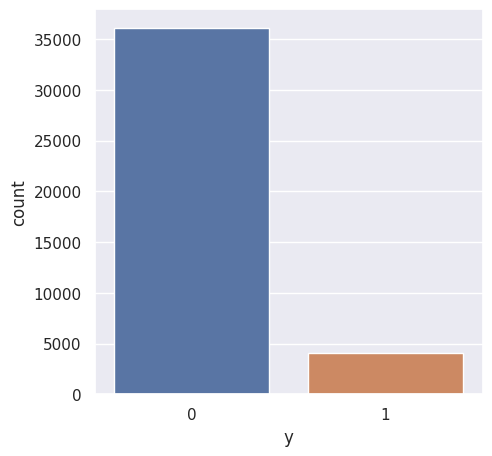

In [111]:
# Visualising imbalance present in the dependent variable.
plt.figure(figsize=(5, 5))
sns.countplot(x='y',data=df)

In [112]:
# Handling Imbalanced Dataset.
from imblearn.over_sampling import RandomOverSampler
os =  RandomOverSampler()
X_new,y_new=os.fit_resample(X,y)

In [113]:
# Visualising dependent variable after deal with imbalance.
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))

Original dataset shape Counter({0: 36155, 1: 4054})
Resampled dataset shape Counter({0: 36155, 1: 36155})


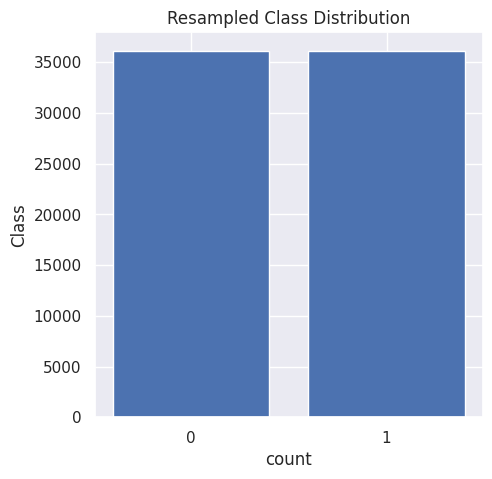

In [114]:
# Plot the class distribution after resampling
plt.figure(figsize=(5, 5))
plt.bar([0, 1], list(Counter(y_new).values()))
plt.xlabel('count')
plt.ylabel('Class')
plt.title('Resampled Class Distribution')
plt.xticks([0, 1], ['0', '1'])
plt.show()

#Feature Importance


#Preprocessing

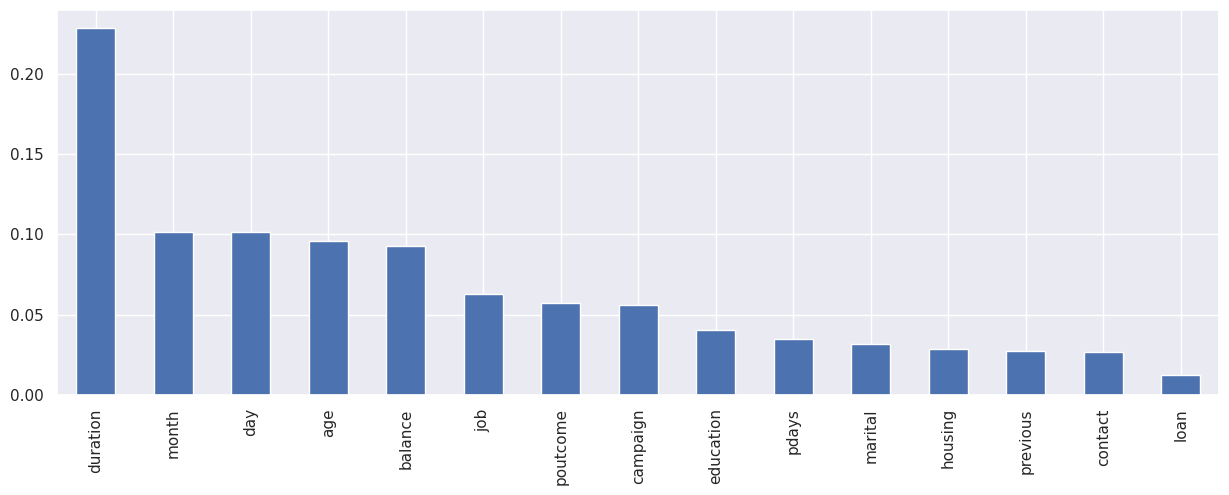

In [115]:
# Visualising the feature importance in dissending format.
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='bar')
plt.show()

Based on above visualisation important features we are going to consider for machine learning models are:

* duration
* month
* day
* age
* balance
* job
* campaign
* poutcome
* education
* pdays
* marital
* previous
* contact
* housing
* loan

###Train Test Split

In [116]:
x_train, x_test, y_train, y_test = train_test_split(X_new,y_new,test_size = 0.2, random_state = 0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(57848, 16) (14462, 16) (57848,) (14462,)


In [117]:
print('Train data shape {} {}'.format(x_train.shape, y_train.shape))
print('Test data shape {} {}'.format(x_test.shape, y_test.shape))

Train data shape (57848, 16) (57848,)
Test data shape (14462, 16) (14462,)


In [118]:
# y train value counts.
y_train.value_counts()

0    29008
1    28840
Name: y, dtype: int64

In [119]:
# y test value counts.
y_test.value_counts()

1    7315
0    7147
Name: y, dtype: int64

In [120]:
# Data Scaling.
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

#**Model Training**

# **LOGISTIC REGRESSION**



In [121]:
model=LogisticRegression()
model=model.fit(x_train,y_train)
pred=model.predict(x_test)
lr_probability =model.predict_proba(x_test)[:,1]


acc_lr=accuracy_score(y_test,pred)
recall_lr=recall_score(y_test,pred)
precision_lr=precision_score(y_test,pred)
f1score_lr=f1_score(y_test,pred)
AUC_LR=roc_auc_score(pred,y_test)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.8059051306873185
ROC_AUC Score: 0.8059479000751258


In [122]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      7272
           1       0.80      0.81      0.81      7190

    accuracy                           0.81     14462
   macro avg       0.81      0.81      0.81     14462
weighted avg       0.81      0.81      0.81     14462



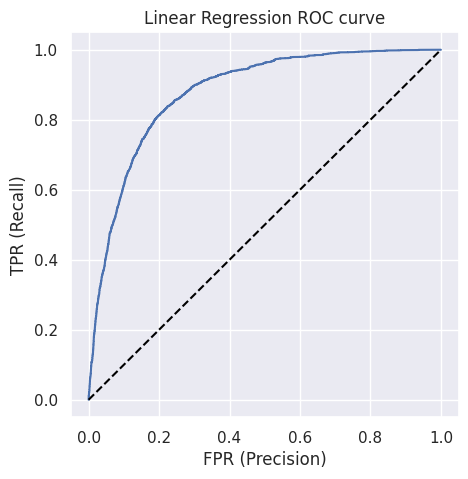

In [123]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, lr_probability)
plt.figure(figsize=(5, 5))
plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[5806 1341]
 [1466 5849]]


<Axes: >

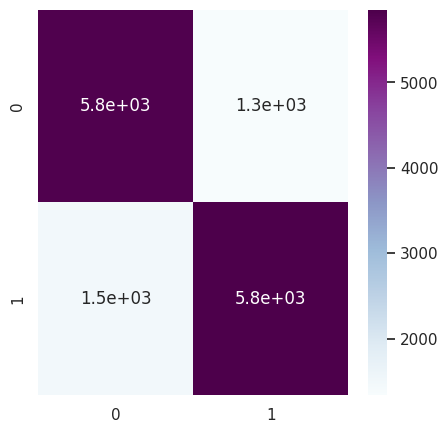

In [124]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

# **RANDOM FOREST**

In [138]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_test)
RF_probability = randomforest.predict_proba(x_test)[:,1]



AUC_RF=roc_auc_score(y_pred,y_test)
acc_rf=accuracy_score(y_test,y_pred)
recall_rf=recall_score(y_test,y_pred)
precision_rf=precision_score(y_test,y_pred)
f1score_rf=f1_score(y_test,y_pred)

print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_RF)

Accuracy :  0.8059051306873185
ROC_AUC Score: 0.9761454387820562


In [126]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      6785
           1       1.00      0.95      0.98      7677

    accuracy                           0.97     14462
   macro avg       0.97      0.98      0.97     14462
weighted avg       0.98      0.97      0.97     14462



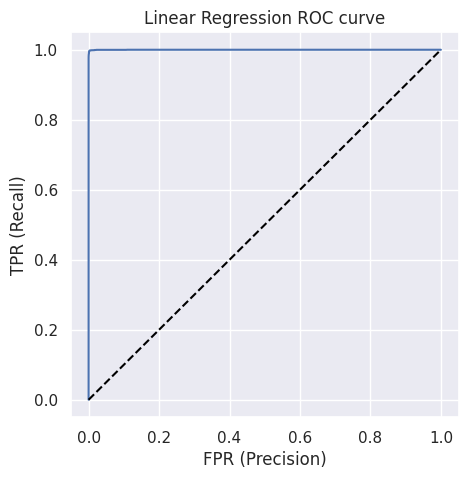

In [127]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, RF_probability)
plt.figure(figsize=(5, 5))
plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')
plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[6783    2]
 [ 364 7313]]


<Axes: >

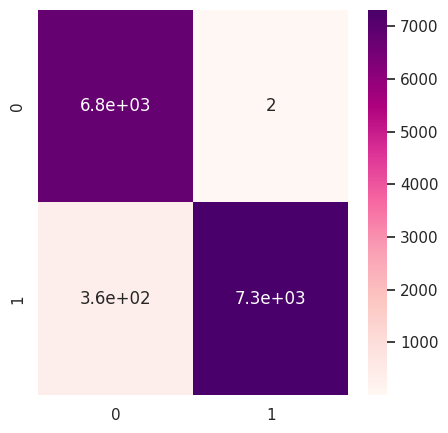

In [128]:
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

# **XGBoost**

In [139]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(x_train, y_train)
y_predict = XGB_fit.predict(x_test)
XGB_probability = XGB_fit.predict_proba(x_test)[:,1]

acc_xgb=accuracy_score(y_test,y_predict)
recall_xgb=recall_score(y_test,y_predict)
precision_xgb=precision_score(y_test,y_predict)
f1score_xgb=f1_score(y_test,y_predict)

AUC_xgb=roc_auc_score(y_predict,y_test)


print("Accuracy : ", accuracy_score(y_test,pred))
print("ROC_AUC Score:",AUC_xgb)

Accuracy :  0.8059051306873185
ROC_AUC Score: 0.9359077181723838


In [130]:
print(classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6597
           1       0.97      0.90      0.94      7865

    accuracy                           0.93     14462
   macro avg       0.93      0.94      0.93     14462
weighted avg       0.94      0.93      0.93     14462



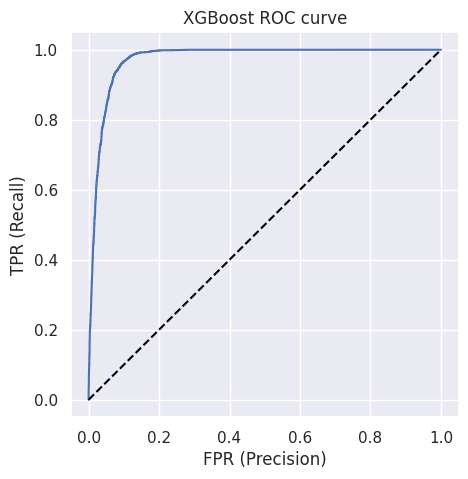

In [131]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test, XGB_probability)
plt.figure(figsize=(5, 5))
plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[6388  759]
 [ 209 7106]]


<Axes: >

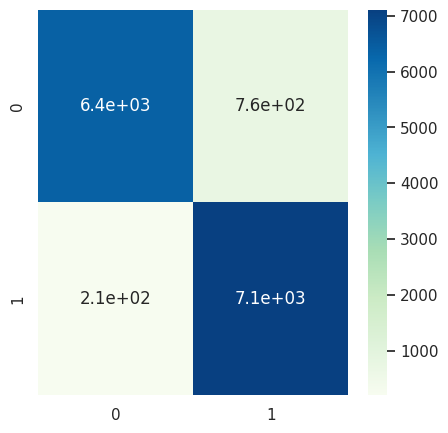

In [132]:
#it helps to identify how many values are classified correctly
plt.figure(figsize=(5, 5))
cm=confusion_matrix(y_test,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

##Comparing the model

In [133]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.805905,0.799590,0.813491,0.806481,0.805948
Randomforest,0.974692,0.999727,0.952586,0.975587,0.976145
XGBClassifier,0.933066,0.971429,0.903497,0.936232,0.935908


# **Conclusion:-**



#Conclusion : - ML model
In conclusion, a machine learning model for predicting Bank Marketing Effective Prediction can be developed using various algorithms such as logestic regression, random forest and XG Boost. The model's performance can be evaluated using metrics such as Test auc and Test Accuracy.It is also important to note that the model should be regularly retrained and updated with new data to ensure its continued performance.

* The top-performing models in terms of accuracy and AUCare the random forest and XGBoost models, with identical scores for all metrics. This suggests that these models are equally good at predicting the target variable.

* The logistic regression had lower scores than the other models for all metrics, suggesting that they may not be as effective at predicting the target variable.

* Overall, the random forest and  XGBoost are the most effective models for predicting the target variable based on the evaluation metrics provided. However, it's important to note that other factors, such as model interpretability and computational complexity, may also be important considerations in choosing the best model for a specific task.


#Conclusion :- EDA

* It was a great learning experience working on a financial dataset.
Our dataset consist of categorical and numerical features.

* We have 16 independent features, out of these only half of them are important.
'duration' is the most important feature while 'loan' is the least important feature.

* Month of May have seen the highest number of clients contacted but have the least success rate. Highest success rate is observed for end month of the financial year as well as the calendar year. So one can say that our dataset have some kind of seasonality.

* When visualized age in groups, it is found that clients with age less than 30 and greater than 60 are less contacted through the campaign but have a higher success rate.

* More campaign lead to a more positive impact on the deposit of an account.

* Top contacted clients are from job type: 'blue-collar', 'management' & 'technician'.

* Very few clients are contacted who are defaulter,
